# Homework 5

## Problem 1

Consider the damped oscillation
$$
  \ddot{x} + 2\beta\dot{x} + \omega^2_0 x =0.
$$

For a given set of $\beta$ and $\omega_0$ and initial conditions $x(0)$ and $\dot{x}(0)$:
* Plot $x(t)$.
* Plot $E(t)$.
* Plot $dE(t)/dt$.
* Plot the phase-path on the $x-\dot{x}$ plane.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<function __main__.ocs>

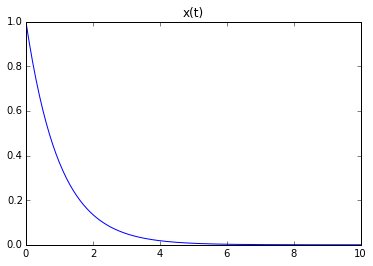

In [2]:
# Problem 1
import numpy as np

from IPython.html.widgets import interact
# Problem 1

b = np.arange(0,2,0.5)

t = np.linspace(0.,10.,200)

def sq1(b,w):
    return np.sqrt(w-b**2)
def sq2(b,w):
    return np.sqrt(b**2-w)
## x(0)=1 v(0)=0
def ocs(beta,w):
    if  beta < w:
        x = np.exp(-beta*t)*np.cos(sq1(beta,w)*t)
    elif beta >= w:
        x = np.exp(-beta*t)*np.exp(sq2(beta,w)*t)
    plot(t,x)
    title('x(t)')
    

interact(ocs,beta=(0.,2,),w=(0.,2.))

<function __main__.Eocs>

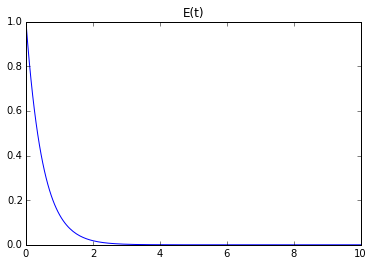

In [3]:
#E(t)
#m = 1 ,k = w0^2
def under_x(b,w,t):
    return np.exp(-b*t)*np.cos(sq1(b,w)*t)
def over_x(b,w,t):
    return np.exp(-b*t)*np.exp(sq2(b,w)*t)
def under_v(b,w,t):
    return (-b*np.exp(-b*t)*np.cos(sq1(b,w)*t))+(-sq1(b,w)*np.exp(-b*t)*np.sin(sq1(b,w)*t))
def over_v(b,w,t):
    return (-b+sq2(b,w))*np.exp(-b*t)*np.exp(sq2(b,w)*t)

def Eocs(beta,w):
    if  beta<w:
        E = ((w**2)*(under_x(beta,w,t))**2+under_v(beta,w,t)**2)/2
    elif beta >= w:
        E = ((w**2)*(over_x(beta,w,t)**2)+over_v(beta,w,t)**2)/2
    plot(t,E)
    title('E(t)')
   

interact(Eocs,beta=(0.,2,),w=(0.,2.))

<function __main__.xvplot>

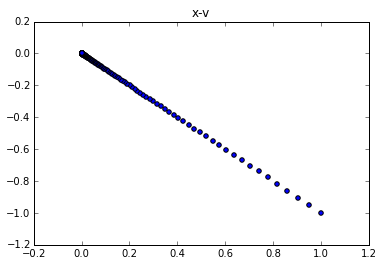

In [4]:
#x-v  

def xvplot(beta,w):
    if  beta<w:
        x = under_x(beta,w,t)
        v = under_v(beta,w,t)
    elif beta >= w:
        x = over_x(beta,w,t)
        v = over_v(beta,w,t)
    scatter(x,v)
    title('x-v')

interact(xvplot,beta=(0.,2,),w=(0.,2.))

## Problem 2

Consider the driven oscillation
$$
  \ddot{x} + 2\beta\dot{x} + \omega^2_0 x = A\cos(\omega t).
$$

For a given set of $\beta$, $\omega_0$ and $\omega$:
* Plot quality factor $Q$ as a function of $\omega$.
* Plot phase angle $\delta$ as a function of $\omega$.
* Use IPython Interact to let the user changes the values of $\beta$, $\omega_0$ and $\omega$.

<function __main__.Dplot>

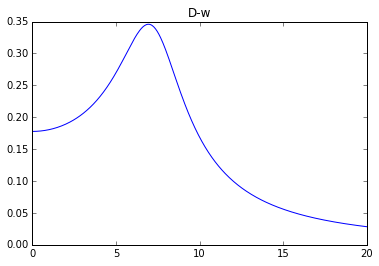

In [5]:
# Problem 2
# A = 10
w = np.linspace(0,20,400)

def Damplitude(b,w0,w):
    return 10/(np.sqrt(((w0**2-w**2))**2+(2*w*b)**2))

def Dplot(b,w0):
    D = Damplitude(b,w0,w)
    plot(w,D)
    title('D-w')

interact(Dplot,b=(0.,4.),w0=(0.,15.))

<function __main__.phaseplot>

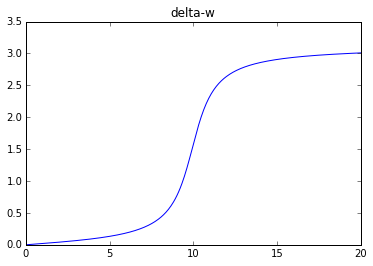

In [6]:
#delta 
def delta(b,w0,w):
    theta = (np.arctan((2*w*b)/(w0**2-w**2)))
    for a in range(len(theta)):
        if theta[a]<0:
            theta[a] = np.pi+theta[a]
    return theta

def phaseplot(b,w0):
    d = delta(b,w0,w)
    plot(w,d)
    title('delta-w')
    
interact(phaseplot,b=(0.,2.),w0=(5.,15.))

## Problem 3

Write a definition for a class named `Kangaroo` with the following methods:

* An `__init__` method that initializes an attribute named `pouch_contents` to an empty list.
* A method named `put_in_pouch` that takes an object of any type and adds it to `pouch_contents`.
* A `__str__` method that returns a string representation of the Kangaroo object and the contents of the pouch.

Test your code by creating two Kangaroo objects, assigning them to variables named `kanga` and `roo`, and then adding `roo` to the contents of `kanga`’s pouch

In [7]:
# Problme 3
# Problme 3

class Kangaroo(object):
    "Kangarooooooowwooo"
    #1
    def __init__(self,contents=[]):
        self.pouch_contents = contents
    def __init__(self, contents=None):
        if contents == None:
            contents = []
        self.pouch_contents = contents
    #2
    def put_in_pouch(self, item):
        self.pouch_contents.append(item)
    #3
    def __str__(self):
        t = [ object.__str__(self) + ' with pouch contents:' ]
        for obj in self.pouch_contents:
            s = '    ' + object.__str__(obj)
            t.append(s)
        return '\n'.join(t)
    
#test
kanga = Kangaroo()
roo = Kangaroo()
kanga.put_in_pouch('kanga')
kanga.put_in_pouch('roo')
kanga.put_in_pouch(roo)

print kanga
print roo

#from thinking python


<__main__.Kangaroo object at 0x000000000AE57E80> with pouch contents:
    'kanga'
    'roo'
<__main__.Kangaroo object at 0x000000000AE57EB8> with pouch contents:


## Problem 4

Write a `__cmp__` method for `Time` objects. 

In [7]:
# Problem 4
#from chap 17
def int_to_time(seconds):
    time = Time()
    minutes, time.second = divmod(seconds, 60)
    time.hour, time.minute = divmod(minutes, 60)
    return time


class Time(object):
    """Represents the time of day.
    attributes: hour, minute, second
    """
    
    # special methods
    def __init__(self, hour=0, minute=0, second=0):
        self.hour = hour
        self.minute = minute
        self.second = second

    def __str__(self):
        return '%.2d:%.2d:%.2d' % (self.hour, self.minute, self.second)
    
    # methods
     
        
    def time_to_int(self):
        minutes = self.hour * 60 + self.minute
        seconds = minutes * 60 + self.second
        return seconds
    

    # operator overloading
    #cmp
    def __cmp__(self, other):
        return cmp(self.time_to_int() , other.time_to_int())
    
a = Time(9, 45,1)
b = Time(1, 35,1)
c = Time(9, 45,1)
print a
print b
print a<b
print a>b
print c==a
print c>a

09:45:01
01:35:01
False
True
True
False


## Problem 5

Write a `Deck` method named `sort` that uses the list method `sort` to sort the cards in a `Deck`. `sort` uses the `__cmp__` method we defined to determine sort order.

In [8]:
# Problem 5
class Card(object):
    """Represents a standard playing card."""

    # class attributes
    suit_names = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
    rank_names = [None, 'Ace', '2', '3', '4', '5', '6', '7', 
              '8', '9', '10', 'Jack', 'Queen', 'King']

    # special methods
    def __str__(self):
        return '%s of %s' % (Card.rank_names[self.rank],
                             Card.suit_names[self.suit])    
    
    def __init__(self, suit=0, rank=2):
        self.suit = suit
        self.rank = rank
        
    # operator overloading
    # verbose version
    def __cmp__(self, other):
        # check the suits
        if self.suit > other.suit: return 1
        if self.suit < other.suit: return -1

        # suits are the same... check ranks
        if self.rank > other.rank: return 1
        if self.rank < other.rank: return -1

        # ranks are the same... it's a tie
        return 0  
    
    # concise version, using tuple
    def __cmp__(self, other):
        t1 = self.suit, self.rank
        t2 = other.suit, other.rank
        return cmp(t1, t2)

    
class Deck(object):

    # special methods
    def __init__(self):
        self.cards = []
        for suit in range(4):
            for rank in range(1, 14):
                card = Card(suit, rank)
                self.cards.append(card)

    def __str__(self):
        res = []
        for card in self.cards:
            res.append(str(card))
        return '\n'.join(res)

    # methods
    def pop_card(self):
        return self.cards.pop()
    
    def add_card(self, card):
        self.cards.append(card)    
        
    def shuffle(self):
        random.shuffle(self.cards)
    #sort /ch12.7
    def sort(self):
        self.cards.sort(cmp=Card.__cmp__)

In [15]:
deck = Deck()
deck.shuffle()
print deck
print '-------------'
deck.cards.sort()
print deck

Jack of Hearts
Jack of Clubs
Queen of Hearts
Ace of Clubs
6 of Clubs
7 of Spades
8 of Hearts
4 of Hearts
King of Spades
5 of Diamonds
10 of Hearts
3 of Hearts
5 of Spades
10 of Diamonds
2 of Spades
King of Hearts
5 of Hearts
9 of Diamonds
8 of Spades
6 of Spades
7 of Hearts
8 of Diamonds
7 of Diamonds
2 of Diamonds
4 of Clubs
2 of Clubs
Ace of Hearts
9 of Clubs
Queen of Spades
4 of Spades
10 of Spades
8 of Clubs
King of Diamonds
Ace of Spades
9 of Spades
3 of Spades
3 of Clubs
Jack of Diamonds
King of Clubs
9 of Hearts
5 of Clubs
Jack of Spades
3 of Diamonds
6 of Diamonds
2 of Hearts
4 of Diamonds
10 of Clubs
7 of Clubs
Ace of Diamonds
6 of Hearts
Queen of Diamonds
Queen of Clubs
-------------
Ace of Clubs
2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Diamonds
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamond

## Problem 6

The following are the possible hands in poker, in increasing order of value (and decreasing order of probability):

**pair:**
two cards with the same rank

**two pair:**
two pairs of cards with the same rank

**three of a kind:**
three cards with the same rank

**straight:**
five cards with ranks in sequence (aces can be high or low, so Ace-2-3-4-5 is a straight and so is 10-Jack-Queen-King-Ace, but Queen-King-Ace-2-3 is not.)

**flush:**
five cards with the same suit

**full house:**
three cards with one rank, two cards with another

**four of a kind:**
four cards with the same rank

**straight flush:**
five cards in sequence (as defined above) and with the same suit

**Modify** the following codes.

Add methods to `PokerHand` class named `has_pair`, `has_twopair`, etc. that return `True` or `False` according to whether or not the hand meets the relevant criteria. Your code should work correctly for “hands” that contain any number of cards (although 5 and 7 are the most common sizes)

In [9]:
import random


class Card(object):
    """Represents a standard playing card.
    
    Attributes:
      suit: integer 0-3
      rank: integer 1-13
    """

    suit_names = ["Clubs", "Diamonds", "Hearts", "Spades"]
    rank_names = [None, "Ace", "2", "3", "4", "5", "6", "7", 
              "8", "9", "10", "Jack", "Queen", "King"]

    def __init__(self, suit=0, rank=2):
        self.suit = suit
        self.rank = rank

    def __str__(self):
        """Returns a human-readable string representation."""
        return '%s of %s' % (Card.rank_names[self.rank],
                             Card.suit_names[self.suit])

    def __cmp__(self, other):
        """Compares this card to other, first by suit, then rank.

        Returns a positive number if this > other; negative if other > this;
        and 0 if they are equivalent.
        """
        t1 = self.suit, self.rank
        t2 = other.suit, other.rank
        return cmp(t1, t2)


class Deck(object):
    """Represents a deck of cards.

    Attributes:
      cards: list of Card objects.
    """
    
    def __init__(self):
        self.cards = []
        for suit in range(4):
            for rank in range(1, 14):
                card = Card(suit, rank)
                self.cards.append(card)

    def __str__(self):
        res = []
        for card in self.cards:
            res.append(str(card))
        return '\n'.join(res)

    def add_card(self, card):
        """Adds a card to the deck."""
        self.cards.append(card)

    def remove_card(self, card):
        """Removes a card from the deck."""
        self.cards.remove(card)

    def pop_card(self, i=-1):
        """Removes and returns a card from the deck.

        i: index of the card to pop; by default, pops the last card.
        """
        return self.cards.pop(i)

    def shuffle(self):
        """Shuffles the cards in this deck."""
        random.shuffle(self.cards)

    def sort(self):
        """Sorts the cards in ascending order."""
        self.cards.sort()

    def move_cards(self, hand, num):
        """Moves the given number of cards from the deck into the Hand.

        hand: destination Hand object
        num: integer number of cards to move
        """
        for i in range(num):
            hand.add_card(self.pop_card())
    def sort(self):
        self.cards.sort(cmp=Card.__cmp__)

##
class Hand(Deck):
    """Represents a hand of playing cards."""
    
    def __init__(self, label=''):
        self.cards = []
        self.label = label


In [10]:
class PokerHand(Hand):
    #def suit_hist(self):\
    def hist(self):
        """Builds a histogram of the suits that appear in the hand.

        Stores the result in attribute suits.
        """
        self.suits = {}
        self.ranks = {}
        for card in self.cards:
            self.suits[card.suit] = self.suits.get(card.suit, 0) + 1
            self.ranks[card.rank] = self.ranks.get(card.rank,0) + 1
        self.sets = self.ranks.values()
        self.sets.sort(reverse=True) #if sets = [2,1,2,1] will fail
            

    def has_flush(self):
        """Returns True if the hand has a flush, False otherwise.
      
        Note that this works correctly for hands with more than 5 cards.
        """
        self.suit_hist()
        for val in self.suits.values():
            if val >= 5:
                return True
        return False
#    
    def check_sets(self, *t):
        for need, have in zip(t, self.sets):
            if need > have: 
                return False
        return True
    
    def has_pair(self):
        return self.check_sets(2)
    
    def has_twopair(self):
        return self.check_sets(2, 2)
    
    def has_threekind(self):
        return self.check_sets(3)
    
    def has_fourkind(self):
        return self.check_sets(4)
    
    def has_fullhouse(self):
        return self.check_sets(3, 2)
    
    def has_straight(self):
        # make a copy of the rank histogram before we mess with it
        ranks = self.ranks.copy()
        ranks[14] = ranks.get(1, 0)

        # see if we have 5 in a row
        return self.in_a_row(ranks, 5)
    
    def in_a_row(self, ranks, n):
        """Checks whether the histogram has n ranks in a row.

        hist: map from rank to frequency
        n: number we need to get to
        """
        count = 0
        for i in range(1, 15):
            if ranks.get(i, 0):
                count += 1
                if count == 5: return True
            else:
                count = 0
        return False
    def has_straightflush(self):
        """Checks whether this hand has a straight flush.

        Clumsy algorithm.
        """
        # make a set of the (rank, suit) pairs we have
        s = set()
        for c in self.cards:
            s.add((c.rank, c.suit))
            if c.rank == 1:
                s.add((14, c.suit))

        # iterate through the suits and ranks and see if we
        # get to 5 in a row
        for suit in range(4):
            count = 0
            for rank in range(1, 15):
                if (rank, suit) in s:
                    count += 1
                    if count == 5: return True
                else:
                    count = 0
        return False
    

In [11]:
deck = Deck()
play1 = PokerHand()
deck.shuffle()

for i in range(13):
    play1.add_card(deck.pop_card())
play1.sort()

print play1

play1.hist()


print play1.has_twopair()
print play1.has_straight()
play1.sets


9 of Clubs
Jack of Clubs
Queen of Clubs
Ace of Diamonds
2 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
2 of Hearts
4 of Spades
6 of Spades
9 of Spades
Jack of Spades
True
False


[2, 2, 2, 2, 2, 1, 1, 1]